## -------------------------------------------------------------------
## PROJETO FINAL: MODELO DE REGRESSÃO LINEAR
## GRUPO INFNET "R"
## Data: 08/09/2025
## Descrição: Análise dos fatores que influenciam os custos médicos.
## -------------------------------------------------------------------

### 1ª ETAPA: CONFIGURAÇÃO DO AMBIENTE

In [19]:
### Instalar pacotes
suppressMessages(install.packages("tidyverse"))
suppressMessages(install.packages("corrplot"))

Warning message:
"o pacote 'tidyverse' está em uso e não será instalado"
Warning message:
"o pacote 'corrplot' está em uso e não será instalado"


In [20]:
### Carregar os pacotes
library(tidyverse)
library(corrplot)

### 2ª ETAPA: CARGA E VERIFICAÇÃO DOS DADOS

In [21]:
dados <- read.csv(".././data/insurance.csv")

In [22]:
# Verificar se os dados foram carregados corretamente
head(dados)
str(dados)

,age,sex,bmi,children,smoker,region,charges
,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,19,female,27.900,0,yes,southwest,16884.924
2,18,male,33.770,1,no,southeast,1725.552
3,28,male,33.000,3,no,southeast,4449.462
4,33,male,22.705,0,no,northwest,21984.471
5,32,male,28.880,0,no,northwest,3866.855
6,31,female,25.740,0,no,southeast,3756.622


'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : chr  "female" "male" "male" "male" ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : chr  "yes" "no" "no" "no" ...
 $ region  : chr  "southwest" "southeast" "southeast" "northwest" ...
 $ charges : num  16885 1726 4449 21984 3867 ...


### 3ª ETAPA: LIMPEZA E PREPARAÇÃO

In [23]:
# A função 'str()' nos mostrou que sex, smoker e region são 'chr'.
# Vamos convertê-los para o tipo 'factor', que é o tipo correto para
# variáveis categóricas no R.
dados <- dados %>%
  mutate(
    sex = as.factor(sex),
    smoker = as.factor(smoker),
    region = as.factor(region)
  )

# Vamos verificar a estrutura novamente para confirmar a mudança.
# Agora você verá 'Factor' ao lado dessas variáveis.
str(dados)


'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 1 ...
 $ region  : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
 $ charges : num  16885 1726 4449 21984 3867 ...


In [24]:
# Verificar se há valores ausentes (NA) no dataset.
# Este comando soma os NAs por coluna.
colSums(is.na(dados))
# Resultado: Zero para todos. Ótimo, nosso dataset é limpo!

age      sex      bmi children   smoker   region  charges 
       0        0        0        0        0        0        0

### 4ª ETAPA: ANÁLISE EXPLORATÓRIA

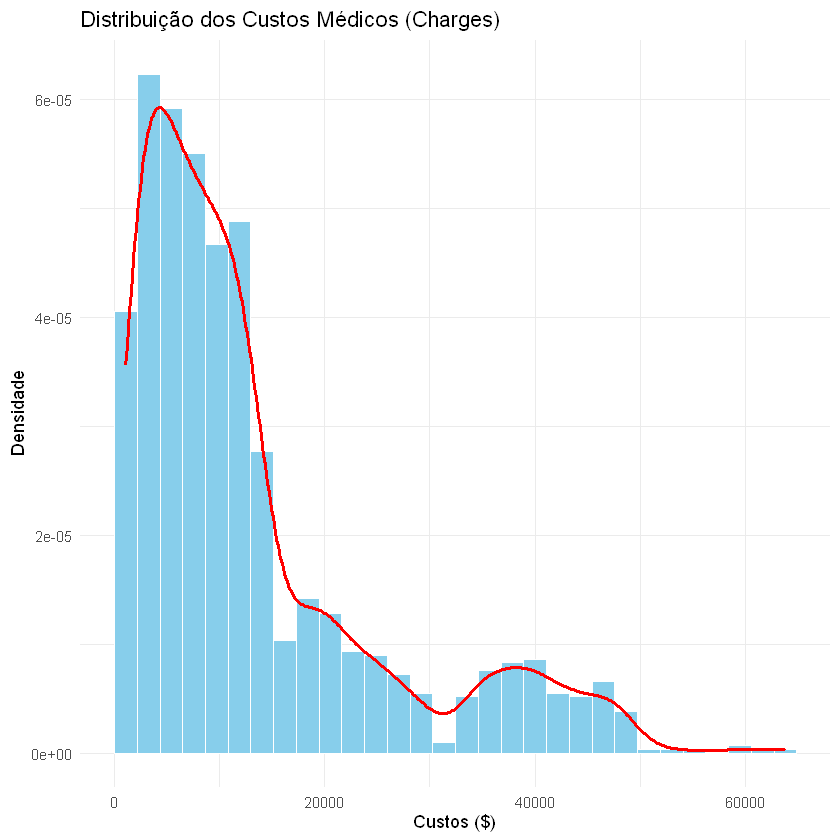

In [25]:
# a) Análise da Variável Dependente (Charges)
# Vamos criar um histograma para ver a distribuição dos custos.
ggplot(dados, aes(x = charges)) +
  geom_histogram(aes(y = ..density..), fill = "skyblue", color = "white", bins = 30) +
  geom_density(col = "red", size = 1) +
  labs(
    title = "Distribuição dos Custos Médicos (Charges)",
    x = "Custos ($)",
    y = "Densidade"
  ) +
  theme_minimal()


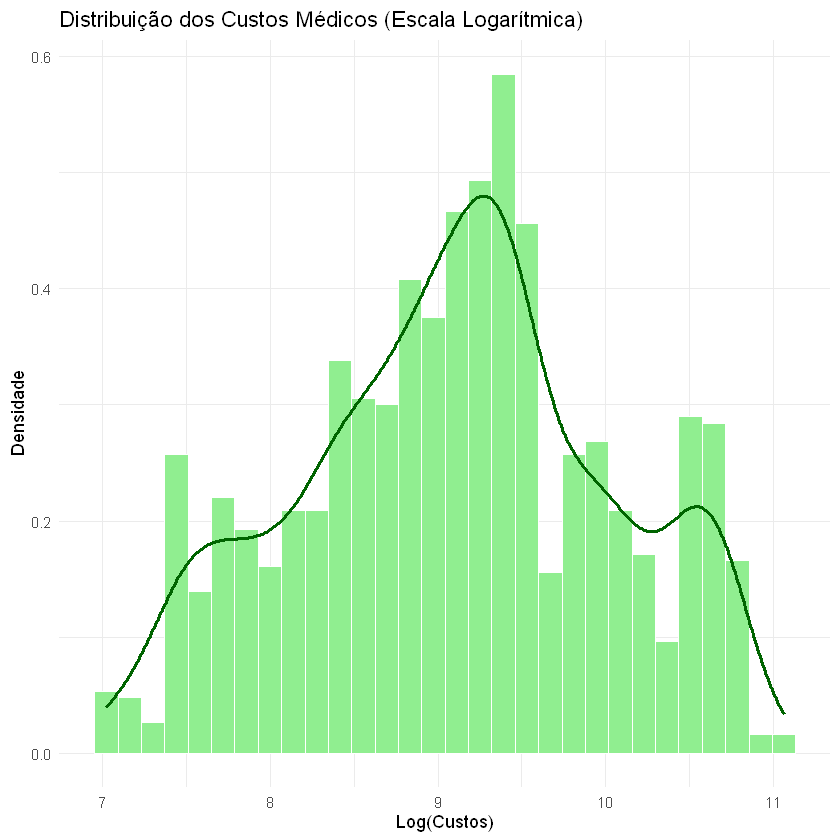

In [26]:
# b) Visualizando a transformação logarítmica
ggplot(dados, aes(x = log(charges))) +
  geom_histogram(aes(y = ..density..), fill = "lightgreen", color = "white", bins = 30) +
  geom_density(col = "darkgreen", size = 1) +
  labs(
    title = "Distribuição dos Custos Médicos (Escala Logarítmica)",
    x = "Log(Custos)",
    y = "Densidade"
  ) +
  theme_minimal()


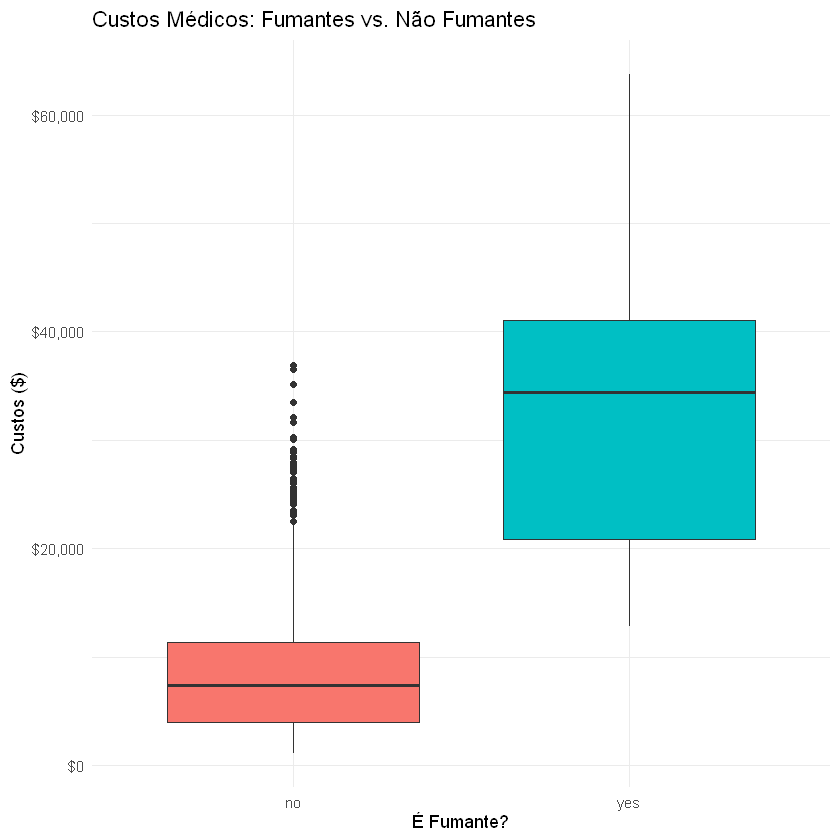

In [27]:
# c) Relação de Charges com Preditores Categóricos

# Charges vs. Smoker
ggplot(dados, aes(x = smoker, y = charges, fill = smoker)) +
  geom_boxplot(show.legend = FALSE) +
  labs(
    title = "Custos Médicos: Fumantes vs. Não Fumantes",
    x = "É Fumante?",
    y = "Custos ($)"
  ) +
  scale_y_continuous(labels = scales::dollar) + # Formata o eixo Y para dólar
  theme_minimal()


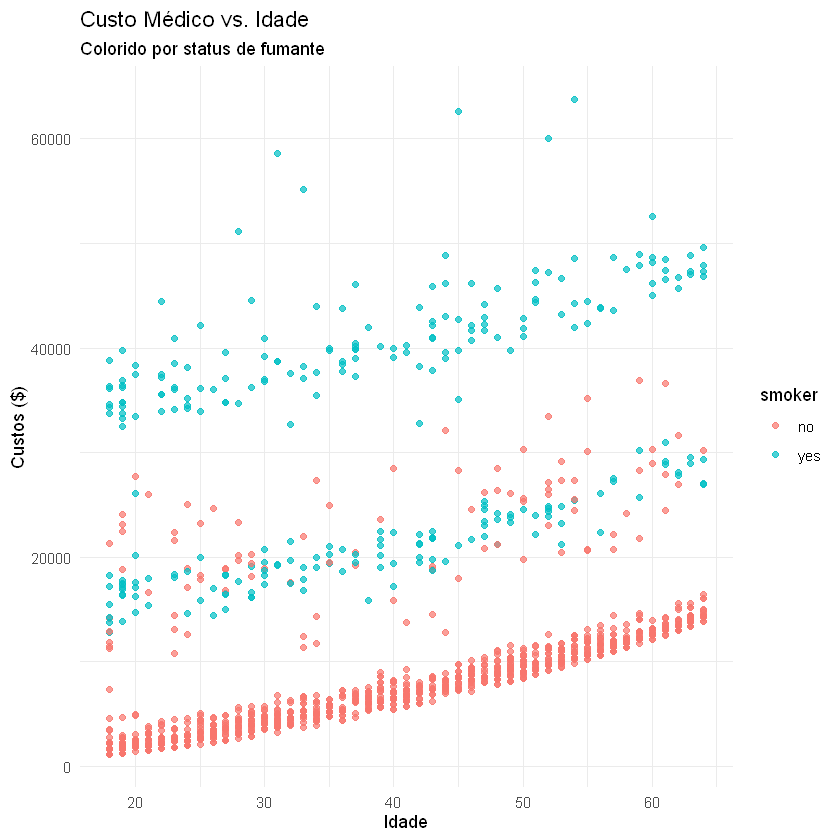

In [28]:
# d) Relação de Charges com Preditores Quantitativos

# Charges vs. Age (colorindo por smoker para mais insights)
ggplot(dados, aes(x = age, y = charges)) +
  geom_point(aes(color = smoker), alpha = 0.7) +
  labs(
    title = "Custo Médico vs. Idade",
    subtitle = "Colorido por status de fumante",
    x = "Idade",
    y = "Custos ($)"
  ) +
  theme_minimal()


### 5ª ETAPA: MODELAGEM - CONSTRUÇÃO DO MODELO

In [29]:
# Vamos construir nosso primeiro modelo usando os preditores que a Análise
# Exploratória sugeriu serem os mais importantes.
# Nossa variável dependente será log(charges) para satisfazer os pressupostos do modelo.

modelo_1 <- lm(log(charges) ~ age + bmi + smoker, data = dados)

In [30]:
# A função summary() nos dá um relatório completo sobre o nosso modelo.
# Este é o output mais importante de toda a sua análise!
summary(modelo_1)


Call:
lm(formula = log(charges) ~ age + bmi + smoker, data = dados)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.21963 -0.21814 -0.04028  0.10353  2.07296 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.0738088  0.0715965  98.801  < 2e-16 ***
age         0.0351455  0.0009113  38.565  < 2e-16 ***
bmi         0.0107729  0.0020990   5.132 3.29e-07 ***
smokeryes   1.5458693  0.0315282  49.031  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4652 on 1334 degrees of freedom
Multiple R-squared:  0.7446,	Adjusted R-squared:  0.744 
F-statistic:  1296 on 3 and 1334 DF,  p-value: < 2.2e-16


### 6ª ETAPA: DIAGNÓSTICO DO MODELO

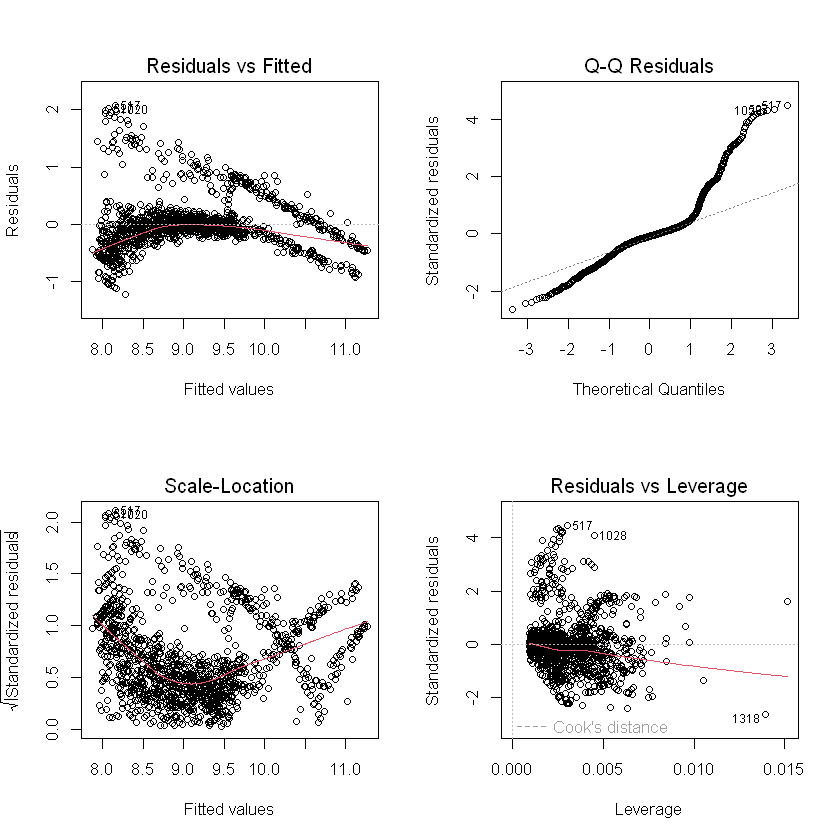

In [31]:
# A função plot() aplicada a um objeto 'lm' gera 4 gráficos de diagnóstico.
# Usamos par(mfrow = c(2, 2)) para arranjar os 4 gráficos em uma grade 2x2.

par(mfrow = c(2, 2))
plot(modelo_1)

# É uma boa prática resetar o layout gráfico para o padrão depois.
par(mfrow = c(1, 1))
